In [67]:
from numpy import*
from matplotlib.pyplot import*
from qiskit import*
from qiskit.tools.visualization import*

In [74]:
qr=QuantumRegister(2,name="qr")
cr=ClassicalRegister(2,name='cr')
qc=QuantumCircuit(qr,cr)

In [75]:
w= 2*pi
l= 0.01*w
t=arange(1,100,1)
backend=BasicAer.get_backend('qasm_simulator')

In [76]:
p,q=[],[]

for i in t:
    qc.x(qr[0])
    qc.barrier()
    qc.rz(w*i,qr[0])
    qc.rz(w*i,qr[1])
    qc.barrier()
    qc.rxx(l*i,qr[0],qr[1])
    qc.ryy(l*i,qr[0],qr[1])
    qc.barrier()
    qc.measure(0,0)
    qc.measure(1,1)

    counts=execute(qc,backend,shots=1024).result().get_counts()
    if '01' in counts:
            p.append(counts['01'])
            q.append(1024-counts['01'])
    else:
        p.append(0)
        q.append(1024)

    qc.reset(qr)    
    print(counts)
    
print(p)
print(q)

{'01': 1023, '10': 1}
{'01': 1002, '10': 22}
{'01': 977, '10': 47}
{'01': 966, '10': 58}
{'01': 932, '10': 92}
{'10': 159, '01': 865}
{'01': 832, '10': 192}
{'01': 769, '10': 255}
{'01': 702, '10': 322}
{'01': 669, '10': 355}
{'10': 411, '01': 613}
{'10': 500, '01': 524}
{'01': 491, '10': 533}
{'01': 417, '10': 607}
{'10': 669, '01': 355}
{'10': 761, '01': 263}
{'10': 790, '01': 234}
{'10': 817, '01': 207}
{'01': 153, '10': 871}
{'10': 935, '01': 89}
{'10': 959, '01': 65}
{'10': 981, '01': 43}
{'10': 1013, '01': 11}
{'10': 1022, '01': 2}
{'10': 1024}
{'10': 1016, '01': 8}
{'10': 1010, '01': 14}
{'10': 999, '01': 25}
{'10': 961, '01': 63}
{'10': 926, '01': 98}
{'10': 892, '01': 132}
{'10': 843, '01': 181}
{'10': 795, '01': 229}
{'10': 695, '01': 329}
{'01': 331, '10': 693}
{'10': 596, '01': 428}
{'01': 475, '10': 549}
{'01': 556, '10': 468}
{'01': 618, '10': 406}
{'01': 655, '10': 369}
{'01': 703, '10': 321}
{'01': 767, '10': 257}
{'01': 823, '10': 201}
{'10': 121, '01': 903}
{'01': 948

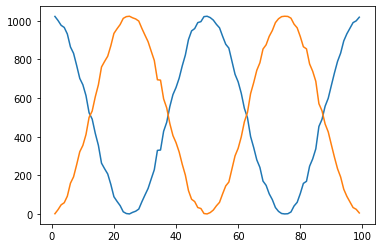

In [77]:
plot(t,p)
plot(t,q)